# 1)Loading the dataset and displaying Contents


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("credit_risk_dataset.csv")

print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

First 5 row

In [4]:
# Checking for  missing values
print("\nMissing Values:")
print(df.isnull().sum())

df.fillna(df.median(), inplace=True)



Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


C:\Users\saumy\AppData\Local\Temp\ipykernel_17020\742736029.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [5]:
#Description
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32581.000000  32581.000000         32581.000000   
mean       11.009620      0.218164             0.170203   
std         3.081611      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000          

# 2)Exploratory data Analysis

## 2.1)Univariate Analysis

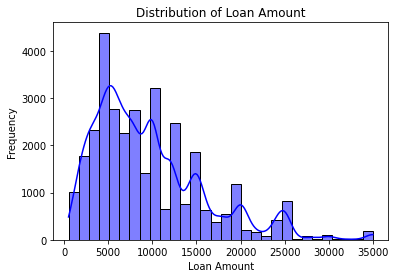

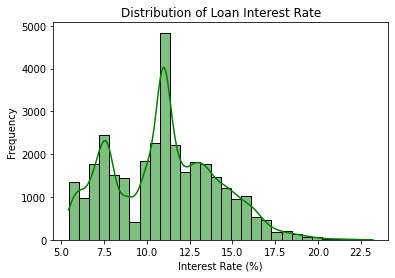

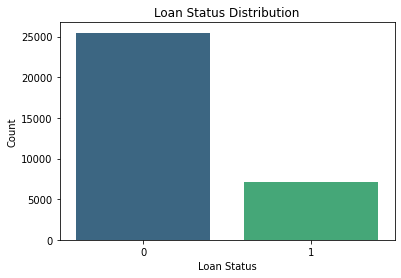

In [6]:
# Viewing Distribution of loan amount
sns.histplot(df['loan_amnt'], kde=True, bins=30, color="blue")
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Distribution of loan interest rate
sns.histplot(df['loan_int_rate'], kde=True, bins=30, color="green")
plt.title("Distribution of Loan Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Countplot for loan status
sns.countplot(data=df, x='loan_status', palette="viridis")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


## 2.2)Bivariate Analysis

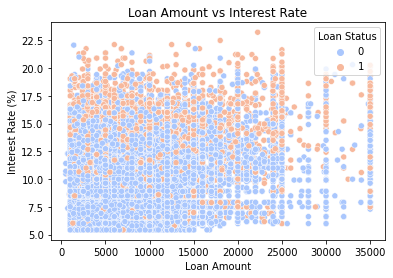

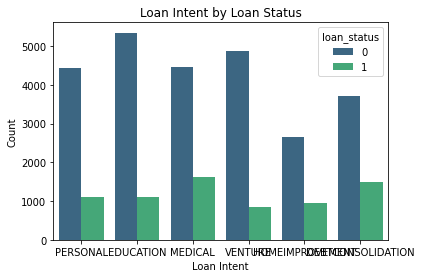

In [46]:
# Displaying Loan amount vs. loan interest rate
sns.scatterplot(data=df, x='loan_amnt', y='loan_int_rate', hue='loan_status', palette="coolwarm")
plt.title("Loan Amount vs Interest Rate")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate (%)")
plt.legend(title="Loan Status")
plt.show()

#Displaying  Loan intent vs. loan status
sns.countplot(data=df, x='loan_intent', hue='loan_status', palette="viridis")
plt.title("Loan Intent by Loan Status")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.show()


## 2.3) Correlation Analysis

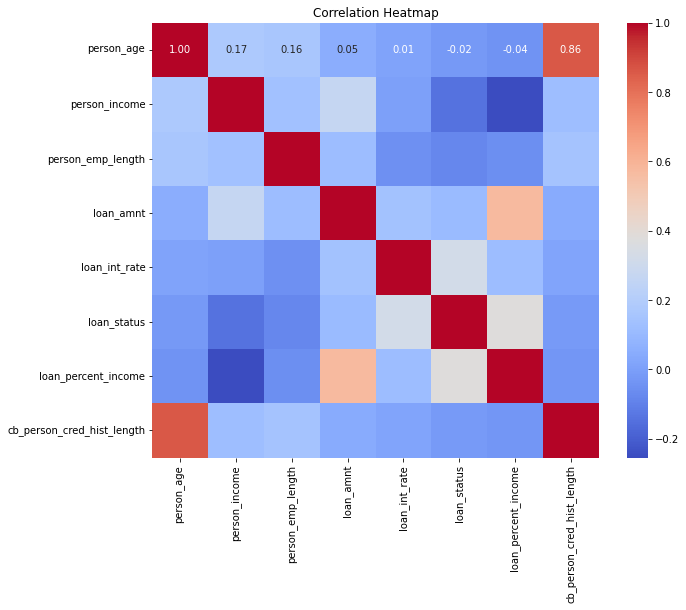

In [8]:
# Correlation heatmap to explore relationship between variables
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 3) Monte Carlo Simulation

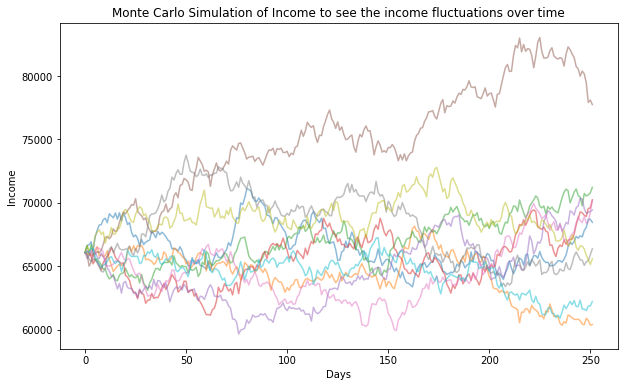

In [9]:
# The Monte Carlo simulation models income fluctuations over time, factoring in growth and volatility
# to assess the risk of loan defaults. By simulating multiple income scenarios, it helps predict a borrower's 
# ability to repay loans, integrating income uncertainty with other factors like credit history for more accurate risk assessments.

def monte_carlo_income_simulation(S0, mu, sigma, T, steps, simulations):
    dt = T / steps
    paths = np.zeros((steps, simulations))
    paths[0] = S0
    for t in range(1, steps):
        Z = np.random.standard_normal(simulations)
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Parameters for income simulation
S0 = df['person_income'].mean()  # Initial average income
mu = 0.02                        # Growth rate
sigma = 0.1                      # Volatility
T = 1                            # 1 year
steps = 252                      # Daily steps
simulations = 500                # Number of simulations

income_paths = monte_carlo_income_simulation(S0, mu, sigma, T, steps, simulations)

# Visualizing income simulation
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(income_paths[:, i], alpha=0.5)
plt.title("Monte Carlo Simulation of Income to see the income fluctuations over time")
plt.xlabel("Days")
plt.ylabel("Income")
plt.show()


# 4) Geometric Brownian Motion (GBM)
##Simulate the effect of interest rate volatility on loan amounts.

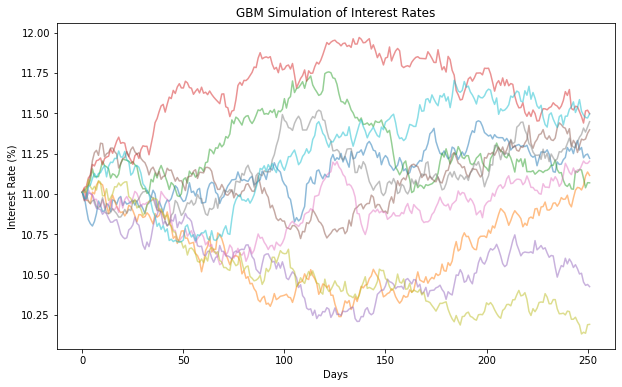

In [10]:
# GBM Simulation
# GBM Simulation for Interest Rate Paths
# This function uses the Monte Carlo simulation to model the fluctuation of interest rates over time,
# based on the Geometric Brownian Motion (GBM) process. The GBM model is commonly used for financial 
# asset price modeling, considering both growth and volatility. Here, it is applied to simulate interest 
# rate changes over a year (T=1) with daily steps (steps=252) and multiple simulation paths.
def gbm_simulation(S0, mu, sigma, T, steps, simulations):
    return monte_carlo_income_simulation(S0, mu, sigma, T, steps, simulations)

# Simulating interest rates
interest_rate_paths = gbm_simulation(S0=df['loan_int_rate'].mean(), mu=0.01, sigma=0.05, T=1, steps=252, simulations=500)

# Visualize interest rate simulation
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(interest_rate_paths[:, i], alpha=0.5)
plt.title("GBM Simulation of Interest Rates")
plt.xlabel("Days")
plt.ylabel("Interest Rate (%)")
plt.show()


# 5) Applying ML (Random forest)

In [11]:
# Preprocess the data by encoding categorical variables into numerical values for model compatibility.
# Split the dataset into training and testing sets to evaluate model performance.
# Scale the features using StandardScaler to standardize the data before applying machine learning algorithms.
# Train a Random Forest model on the training data and evaluate predictions on the test set.
# Use classification report to evaluate precision, recall, and F1-score, and calculate the ROC-AUC score to assess model discrimination ability.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
df['person_home_ownership'] = LabelEncoder().fit_transform(df['person_home_ownership'])
df['loan_intent'] = LabelEncoder().fit_transform(df['loan_intent'])
df['loan_grade'] = LabelEncoder().fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = LabelEncoder().fit_transform(df['cb_person_default_on_file'])

# Features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7613
           1       0.96      0.71      0.81      2162

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.93      0.93      0.92      9775

ROC-AUC Score: 0.9321400306914519


# 6)Applying Deep Learning model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build DL model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Evaluate DL model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/20
713/713 [==============================] - 3s 3ms/step - loss: 0.4052 - accuracy: 0.8296 - val_loss: 0.3488 - val_accuracy: 0.8564
Epoch 2/20
713/713 [==============================] - 2s 3ms/step - loss: 0.3565 - accuracy: 0.8568 - val_loss: 0.3353 - val_accuracy: 0.8643
Epoch 3/20
713/713 [==============================] - 2s 3ms/step - loss: 0.3479 - accuracy: 0.8600 - val_loss: 0.3297 - val_accuracy: 0.8681
Epoch 4/20
713/713 [==============================] - 2s 3ms/step - loss: 0.3366 - accuracy: 0.8658 - val_loss: 0.3187 - val_accuracy: 0.8737
Epoch 5/20
713/713 [==============================] - 2s 3ms/step - loss: 0.3284 - accuracy: 0.8719 - val_loss: 0.3096 - val_accuracy: 0.8771
Epoch 6/20
713/713 [==============================] - 2s 3ms/step - loss: 0.3197 - accuracy: 0.8741 - val_loss: 0.3037 - val_accuracy: 0.8810
Epoch 7/20
713/713 [==============================] - 2s 3ms/step - loss: 0.3161 - accuracy: 0.8754 - val_loss: 0.2986 - val_accuracy: 0.8835
Epoch 

# 7)Visualization

# 7.1) Feature Importance

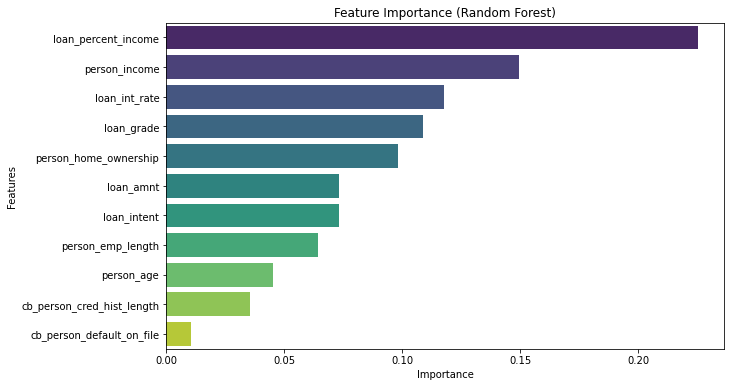

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns

# Creating a DataFrame for plotting
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## 7.2) Prediction Distributions

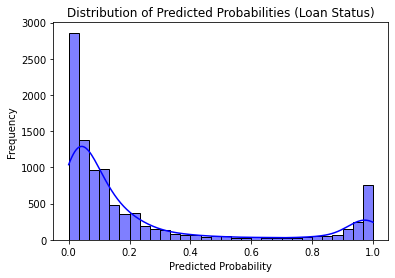

In [15]:
# Predicted probabilities
sns.histplot(y_proba, bins=30, kde=True, color="blue")
plt.title("Distribution of Predicted Probabilities (Loan Status)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


## 7.3) Boxplot of default probabilities

C:\Users\saumy\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


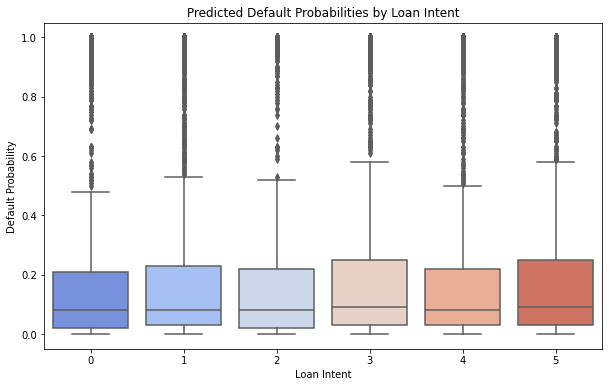

In [24]:
import pandas as pd

# Ensure indices are reset in the DataFrame
df.reset_index(drop=True, inplace=True)

# Convert X_test to a DataFrame if necessary
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=df.columns[:-1])  # Update columns as per your data

# Generate probabilities
y_proba = clf.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Construct test DataFrame
df_test = X_test.copy()
df_test['Predicted Default Probability'] = y_proba

# Add 'loan_intent' from the original DataFrame
df_test['Loan Intent'] = df.loc[df_test.index, 'loan_intent']

# Plot boxplot of predicted default probabilities by loan intent
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Intent', y='Predicted Default Probability', data=df_test, palette="coolwarm")
plt.title("Predicted Default Probabilities by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Default Probability")
plt.show()


## 7.4) Monte Carlo Simulation Results

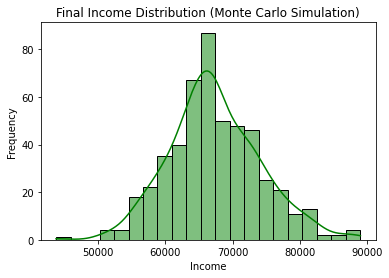

In [17]:
# Final income distribution from Monte Carlo simulation
final_income = income_paths[-1]

# Histogram of final income
sns.histplot(final_income, kde=True, color="green")
plt.title("Final Income Distribution (Monte Carlo Simulation)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


## 7.5) GBM Simulation Result

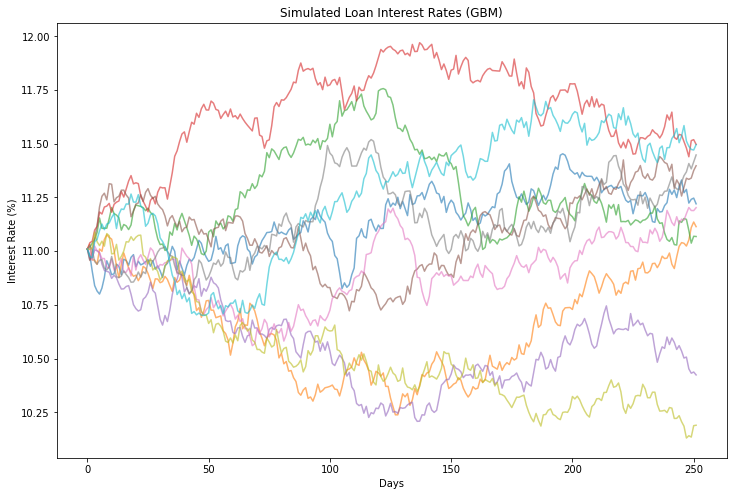

In [18]:
# Plot GBM simulated paths for interest rates
plt.figure(figsize=(12, 8))
for i in range(10):  # Plot 10 paths
    plt.plot(interest_rate_paths[:, i], alpha=0.6)
plt.title("Simulated Loan Interest Rates (GBM)")
plt.xlabel("Days")
plt.ylabel("Interest Rate (%)")
plt.show()


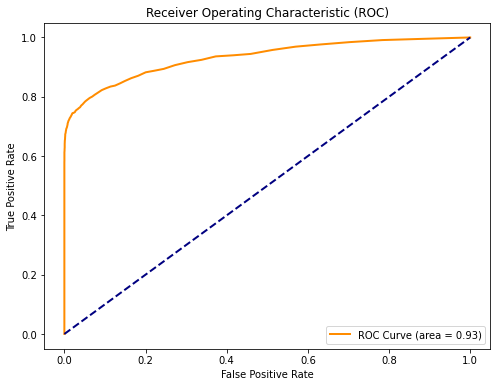

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


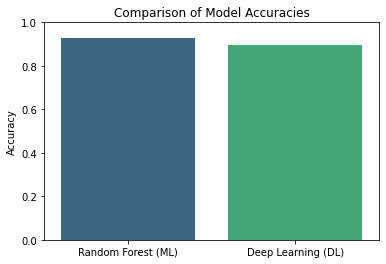

In [20]:
# Model accuracies
ml_accuracy = clf.score(X_test, y_test)  # Random Forest
dl_accuracy = accuracy  # From DL evaluation step

# Create a comparison bar plot
plt.figure(figsize=(6, 4))
models = ['Random Forest (ML)', 'Deep Learning (DL)']
accuracies = [ml_accuracy, dl_accuracy]

sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


306/306 [==============================] - 0s 1ms/step


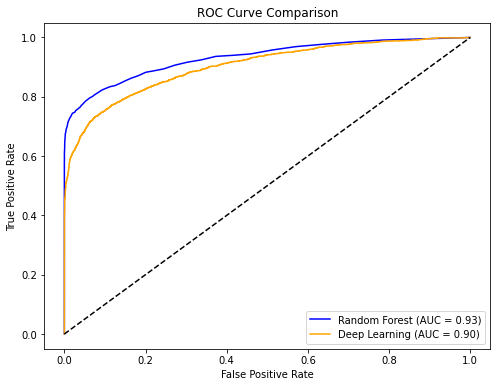

In [21]:
# ROC for Random Forest
fpr_ml, tpr_ml, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc_ml = auc(fpr_ml, tpr_ml)

# ROC for Deep Learning
fpr_dl, tpr_dl, _ = roc_curve(y_test, model.predict(X_test))
roc_auc_dl = auc(fpr_dl, tpr_dl)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_ml, tpr_ml, label=f"Random Forest (AUC = {roc_auc_ml:.2f})", color="blue")
plt.plot(fpr_dl, tpr_dl, label=f"Deep Learning (AUC = {roc_auc_dl:.2f})", color="orange")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


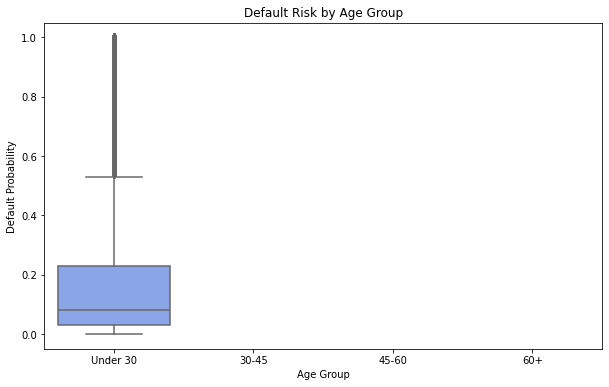

In [25]:
# Add probabilities to the test data
df_test['Default Probability'] = y_proba

# Bin age groups
df_test['Age Group'] = pd.cut(df['person_age'], bins=[0, 30, 45, 60, 100], 
                              labels=['Under 30', '30-45', '45-60', '60+'])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Default Probability', data=df_test, palette="coolwarm")
plt.title("Default Risk by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Default Probability")
plt.show()


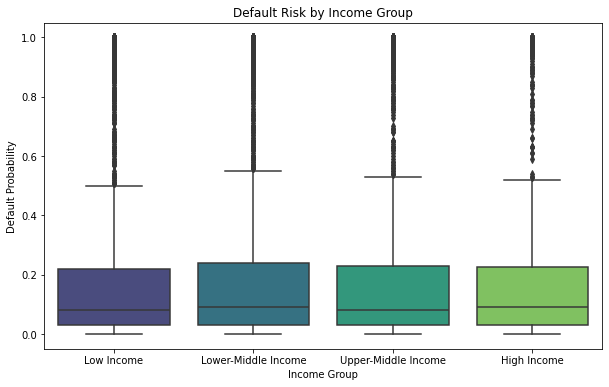

In [26]:
# Bin income groups
df_test['Income Group'] = pd.qcut(df['person_income'], q=4, 
                                  labels=['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income'])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='Default Probability', data=df_test, palette="viridis")
plt.title("Default Risk by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Default Probability")
plt.show()


In [29]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# # Select numeric features for clustering
# numeric_features = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']]
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(numeric_features)

# # Perform PCA for dimensionality reduction
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(scaled_features)

# # Apply K-Means
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# clusters = kmeans.fit_predict(pca_features)

# # Add clusters to the dataset
# df['Cluster'] = clusters


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette="viridis", s=100, alpha=0.8)
# plt.title("Borrower Clusters (K-Means)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend(title="Cluster")
# plt.show()


In [ ]:
# # Profile clusters by summarizing key statistics
# cluster_profiles = df.groupby('Cluster').mean()[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']]
# print("\nCluster Profiles:")
# print(cluster_profiles)


# Threshold Based credit Decision

In [30]:
# Setting a threshold for loan approval
threshold = 0.5

# Add a decision column based on the predicted default probabilities
df_test['Credit Decision'] = df_test['Predicted Default Probability'].apply(
    lambda x: 'Approve' if x < threshold else 'Reject'
)

# Displaying a summary of the decisions
credit_decision_summary = df_test['Credit Decision'].value_counts()
print("Credit Decision Summary:")
print(credit_decision_summary)

# Saving the decision dataset to a file
df_test.to_csv('credit_decision_results.csv', index=False)


Credit Decision Summary:
Approve    8177
Reject     1598
Name: Credit Decision, dtype: int64


# Creidt Scoring System

In [34]:
# Defining FICO-like scoring formula
def probability_to_fico_score(probability, min_score=300, max_score=850):
    """
    Mapping default probabilities to a FICO-like credit score range.
    Higher probabilities (higher risk) result in lower credit scores.
    """
    # Applying a nonlinear transformation to reflect FICO scoring logic
    score_range = max_score - min_score
    return min_score + score_range * (1 - (probability ** 0.5))  # Nonlinear scaling

df_test['FICO Credit Score'] = df_test['Predicted Default Probability'].apply(probability_to_fico_score)

# Displaying a preview of the FICO credit scores
print(df_test[['Predicted Default Probability', 'FICO Credit Score']].head())

df_test.to_csv('fico_credit_scoring_results.csv', index=False)


   Predicted Default Probability  FICO Credit Score
0                           0.03         754.737206
1                           0.22         592.027133
2                           0.35         524.615612
3                           0.96         311.112257
4                           0.99         302.756910


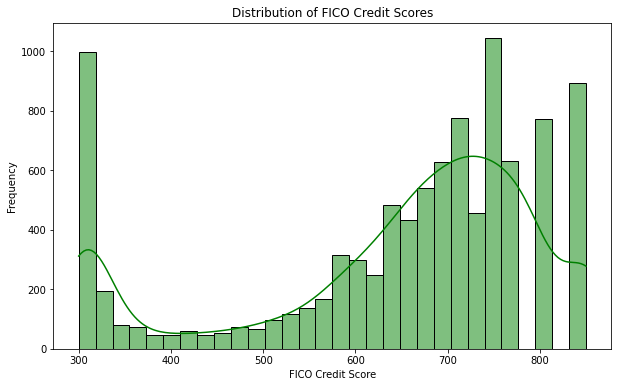

In [35]:
# Histogram for FICO credit scores
plt.figure(figsize=(10, 6))
sns.histplot(df_test['FICO Credit Score'], bins=30, kde=True, color='green')
plt.title("Distribution of FICO Credit Scores")
plt.xlabel("FICO Credit Score")
plt.ylabel("Frequency")
plt.show()


In [31]:
# Mapping default probabilities to a credit score range (300 to 850)
def probability_to_credit_score(probability, min_score=300, max_score=850):
    return max_score - (probability * (max_score - min_score))

# Adding a credit score column
df_test['Credit Score'] = df_test['Predicted Default Probability'].apply(probability_to_credit_score)

# Displaying a preview of the credit scores
print(df_test[['Predicted Default Probability', 'Credit Score']].head())

# Saving the credit scoring results to a file
df_test.to_csv('credit_scoring_results.csv', index=False)


   Predicted Default Probability  Credit Score
0                           0.03         833.5
1                           0.22         729.0
2                           0.35         657.5
3                           0.96         322.0
4                           0.99         305.5


# Results visualization

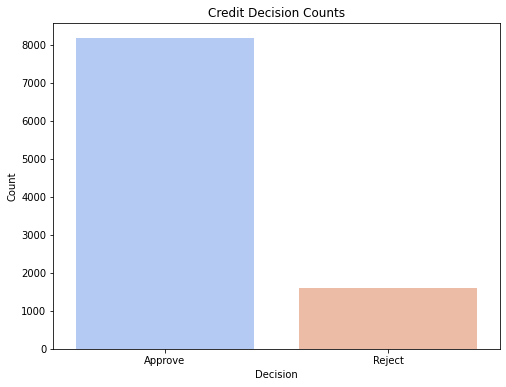

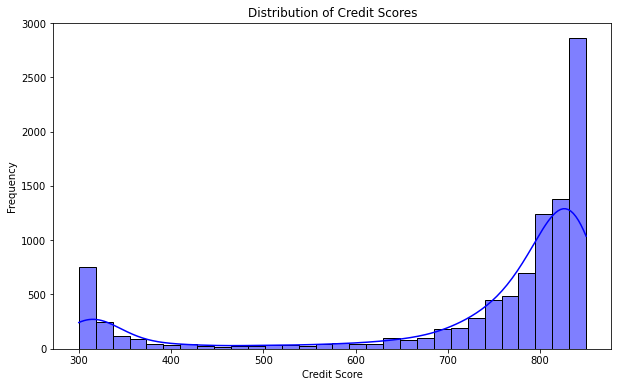

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for credit decision counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit Decision', data=df_test, palette='coolwarm')
plt.title("Credit Decision Counts")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

# Histogram for credit scores
plt.figure(figsize=(10, 6))
sns.histplot(df_test['Credit Score'], bins=30, kde=True, color='blue')
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


In [36]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Handle Missing Values
imputer_mean = SimpleImputer(strategy='mean')
df['person_emp_length'] = imputer_mean.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer_mean.fit_transform(df[['loan_int_rate']])

# Handle Outliers
df['person_age'] = np.clip(df['person_age'], None, 100)  # Cap age at 100
df['person_income'] = np.log1p(df['person_income'])  # Apply log transformation

# Feature Engineering
# Create Debt-to-Income (DTI) Ratio
df['dti_ratio'] = df['loan_amnt'] / df['person_income']

# Create Age Groups
df['age_group'] = pd.cut(
    df['person_age'],
    bins=[0, 25, 45, 65, 100],
    labels=['Young', 'Middle-aged', 'Senior', 'Elderly']
)

# Categorize Loan Interest Rate
df['loan_int_rate_range'] = pd.cut(
    df['loan_int_rate'],
    bins=[0, 10, 20, 30],
    labels=['Low', 'Medium', 'High']
)

# Encode Categorical Variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'age_group', 'loan_int_rate_range']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Target Variable Balancing
X = df.drop('loan_status', axis=1)
y = df['loan_status']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Advanced Modeling with Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)
y_proba_rf = clf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, y_proba_rf))

# Advanced Modeling with XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score (XGBoost):", roc_auc_score(y_test, y_proba_xgb))

# Visualize Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_int_rate'], kde=True, color='blue')
plt.title('Loan Interest Rate Distribution')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['person_income'], kde=True, color='green')
plt.title('Log-Transformed Income Distribution')
plt.xlabel('Log Income')
plt.ylabel('Density')
plt.show()


ImportError: cannot import name 'SimpleImputer' from 'sklearn.impute' (unknown location)

In [41]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("credit_risk_dataset.csv")

# Handle missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors (k)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display information after imputation
st.write("Data after imputation:")
st.write(df_imputed.head())

# Encode categorical variables
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    le = LabelEncoder()
    df_imputed[col] = le.fit_transform(df_imputed[col])
    label_encoders[col] = le

# Split data
X = df_imputed.drop('loan_status', axis=1)
y = df_imputed['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Output classification report and ROC-AUC score
st.write("Classification Report:")
st.text(classification_report(y_test, y_pred))
st.write("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ImportError: cannot import name 'KNNImputer' from 'sklearn.impute' (unknown location)

In [49]:
!pip install --upgrade scikit-learn




[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
